<a href="https://colab.research.google.com/github/parker533/Hello_Net/blob/master/Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating a Simple Model from Housing Data to Predict Median House Value**

For master's in Data science Submission





In [ ]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Reading in test and training data and concatinating it
california_housing_train = pd.read_csv(r"/content/sample_data/california_housing_train.csv")
california_housing_test = pd.read_csv(r"/content/sample_data/california_housing_test.csv")
california_housing_total = pd.concat([california_housing_train,california_housing_test], ignore_index= True)

At first glance,I realised that the rooms per each row is a lot,so the rows are not each house, also, if it was each house then the data will be bigger. My research tells me that each row represent a block group as housing census is recorded per block group.

**Data General Overview**

In [ ]:
california_housing_total.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
california_housing_total.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
19996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
19997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
19998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
19999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [ ]:
california_housing_total.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-119.566172,35.626750,28.627750,2637.051550,537.991800,1425.557650,499.525450,3.872132,207082.716750
std,2.003609,2.136141,12.582229,2176.314757,420.631119,1131.048487,381.729517,1.900356,115557.055856
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.562500,119800.000000
50%,-118.490000,34.250000,29.000000,2126.000000,434.000000,1166.000000,409.000000,3.536000,179800.000000
75%,-118.000000,37.710000,37.000000,3149.000000,647.000000,1724.000000,604.000000,4.745325,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


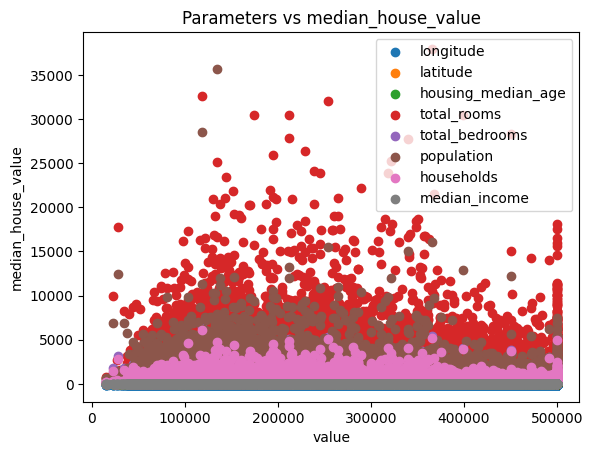

In [ ]:
"""
Visually tried to see which columns correlated more with median_house_value
"""
target = 'median_house_value'
for column in california_housing_total.columns:
  if column != target:#only the str of the column name is needed so a variable is created for it.
    plt.scatter(california_housing_total.median_house_value, california_housing_total[column],label = column)
plt.xlabel('value')
plt.ylabel('median_house_value')
plt.legend()
plt.title('Parameters vs median_house_value')
plt.show()

In [ ]:
#Checking columns for NaN
#Can specify the axis parameter in .any() for rows
california_housing_total.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

**ML Modelling**

In [ ]:
california_housing_test_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']
train_x = california_housing_train[california_housing_test_features]
train_y = california_housing_train.median_house_value
val_x = california_housing_test[california_housing_test_features]
val_y = california_housing_test.median_house_value

In [ ]:
california_housing_model = DecisionTreeRegressor(random_state=1)
california_housing_model.fit(train_x,train_y)

DecisionTreeRegressor(random_state=1)

In [ ]:
# A sneak-peek at our model
cal = val_x.head()
cal1 = val_y.head()
print(cal1)
california_housing_model.predict(cal)

0    344700.0
1    176500.0
2    270500.0
3    330000.0
4     81700.0
Name: median_house_value, dtype: float64


array([411300., 165500., 243500., 470000., 101400.])

In [ ]:
#Prediction and accuracy using mean absolute error
val_predictions = california_housing_model.predict(val_x)
accuracy_mae = mean_absolute_error(val_y,val_predictions)
print(accuracy_mae)

42673.50633333333


In [ ]:
# Using RandomForestRegressor model for better accuracy
california_housing_model_1 = RandomForestRegressor(random_state = 1)
california_housing_model_1.fit(train_x,train_y)
val_predictions_1 = california_housing_model_1.predict(val_x)
accuracy_mae_1 = mean_absolute_error(val_y,val_predictions_1)
print(accuracy_mae_1)

32193.693186666667


**Final Words**

Thank you for looking at my colab notebook. I am aware this is simple
 but I did this to show that despite coming from a biochemistry background,I am familiar with code and working with data. I am still building a strong foundation in data science, so that when admitted in fall, I will have a solid background to build upon.